Phase 1 (All About Libraries)

#SNA#
###Untuk mengukur network dalam suatu komunitas atau jejaring sosial###
dua komponen =
1. nodes : objek orang, organisasi, dsb
2. edges : representasi dari hubungan,

Identifikasilah siapa saja yang berperan penting dalam organisasi Quakers di Inggris pada tahun 1700-an, bagaimana komunitas di dalamnya terbentuk, serta seberapa cepat ide-ide perdamaian dapat menyebar melalui jaringan sosial mereka. Pada tahun 1700-an, Quakers adalah komunitas aktivis yang mempromosikan perdamaian dan perubahan sosial di Inggris. Dalam komunitas ini, keanggotaan dan keterhubungan antar anggota sangat penting untuk menyebarkan ide-ide perdamaian dan mempengaruhi perubahan sosial. Mengingat keterbatasan media pada saat itu, hubungan sosial antar anggota menjadi sarana utama penyebaran informasi dan penguatan pengaruh. Untuk dapat menyelesaikan kasus tersebut, kita akan menggunakan SNA untuk mencari key player nya, mengukur properti jaringannya dan mengukur metrik sentralitasnya.


In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

In [2]:
# Import Network Libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as plt
from itertools import count
from operator import itemgetter
from networkx.drawing.nx_agraph import graphviz_layout
import pylab

Phase 2 (All About Dataset)

In [3]:
# Upload Local Dataset (Nodes)
from google.colab import files
uploaded = files.upload()

Saving quakers_nodelist.csv to quakers_nodelist.csv


In [4]:
# Read in the nodelist file
with open('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

In [5]:
# Set the Nodes Function
node_names = [n[0] for n in nodes]

In [6]:
# Import data local (Edges)
from google.colab import files
uploaded = files.upload()

Saving quakers_edgelist.csv to quakers_edgelist.csv


In [7]:
# Read in the edgelist file
with open('quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader] [1:]

In [8]:
# Print the number of nodes and edges in our two lists
print(len(node_names))
print(len(edges))

119
174


jumlah nodes sebanyak 119 dan jumlah edges sebesar 174

In [9]:
#Initialize the Function
Quakers_Network = nx.Graph() # Initialize a Graph object

In [10]:
#Input the Nodes and Edges to the Function
Quakers_Network.add_nodes_from(node_names)
Quakers_Network.add_edges_from(edges)

In [11]:
#Dataset Information
print(Quakers_Network)

Graph with 119 nodes and 174 edges


Phase 3 (All About SNA)

In [12]:
# Show the nodes
nx.nodes(Quakers_Network)

NodeView(('Joseph Wyeth', 'Alexander Skene of Newtyle', 'James Logan', 'Dorcas Erbery', 'Lilias Skene', 'William Mucklow', 'Thomas Salthouse', 'William Dewsbury', 'John Audland', 'Richard Claridge', 'William Bradford', 'Fettiplace Bellers', 'John Bellers', 'Isabel Yeamans', 'George Fox the younger', 'George Fox', 'John Stubbs', 'Anne Camm', 'John Camm', 'Thomas Camm', 'Katharine Evans', 'Lydia Lancaster', 'Samuel Clarridge', 'Thomas Lower', 'Gervase Benson', 'Stephen Crisp', 'James Claypoole', 'Thomas Holme', 'John Freame', 'John Swinton', 'William Mead', 'Henry Pickworth', 'John Crook', 'Gilbert Latey', 'Ellis Hookes', 'Joseph Besse', 'James Nayler', 'Elizabeth Hooten', 'George Whitehead', 'John Whitehead', 'William Crouch', 'Benjamin Furly', 'Silvanus Bevan', 'Robert Rich', 'John Whiting', 'Christopher Taylor', 'Thomas Lawson', 'Richard Farnworth', 'William Coddington', 'Thomas Taylor', 'Richard Vickris', 'Robert Barclay', 'Jane Sowle', 'Tace Sowle', 'Leonard Fell', 'Margaret Fell', 

In [13]:
# Show the edges
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

In [14]:
# Graph Density
nx.density(Quakers_Network)

0.02478279447372169

density= kepadatan
semakin padat suatu hubungan semakin bagus
kepadatan dari dataset ini sebesar 0.0247... atau 2,47..%

In [15]:
#Shows the Shortest Path from Random People
story_stranger_path = nx.shortest_path(Quakers_Network, source="Hannah Stranger", target="Robert Barclay")
print("Shortest path between Hannah and Robert", story_stranger_path)

Shortest path between Hannah and Robert ['Hannah Stranger', 'James Nayler', 'George Fox', 'George Keith', 'Robert Barclay']


In [16]:
# Community Detection using Modularity
from networkx.algorithms.community import greedy_modularity_communities
greedy_modularity_communities(Quakers_Network)

[frozenset({'Anthony Pearson',
            'Dorcas Erbery',
            'Elizabeth Leavens',
            'Francis Howgill',
            'George Fox the younger',
            'Gervase Benson',
            'Hannah Stranger',
            'James Nayler',
            'Margaret Fell',
            'Martha Simmonds',
            'Richard Farnworth',
            'Robert Rich',
            'Thomas Aldam',
            'Thomas Holme',
            'Thomas Lower',
            'William Gibson',
            'William Tomlinson'}),
 frozenset({'Anne Conway Viscountess Conway and Killultagh',
            'David Lloyd',
            'Edward Haistwell',
            'George Keith',
            'Isaac Norris',
            'Isabel Yeamans',
            'James Logan',
            'Jane Sowle',
            'John Bartram',
            'Joseph Besse',
            'Peter Collinson',
            'Richard Claridge',
            'Samuel Bownas',
            'Tace Sowle',
            'Thomas Story',
            'Willia

ada 18 komunitas pada network

jumlah komunitas dilihat dari frozen set nya

Phase 4 (Data Visualization)

In [17]:
# See what layouts are available in networkX

[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'forceatlas2_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'bfs_layout',
 'arf_layout']

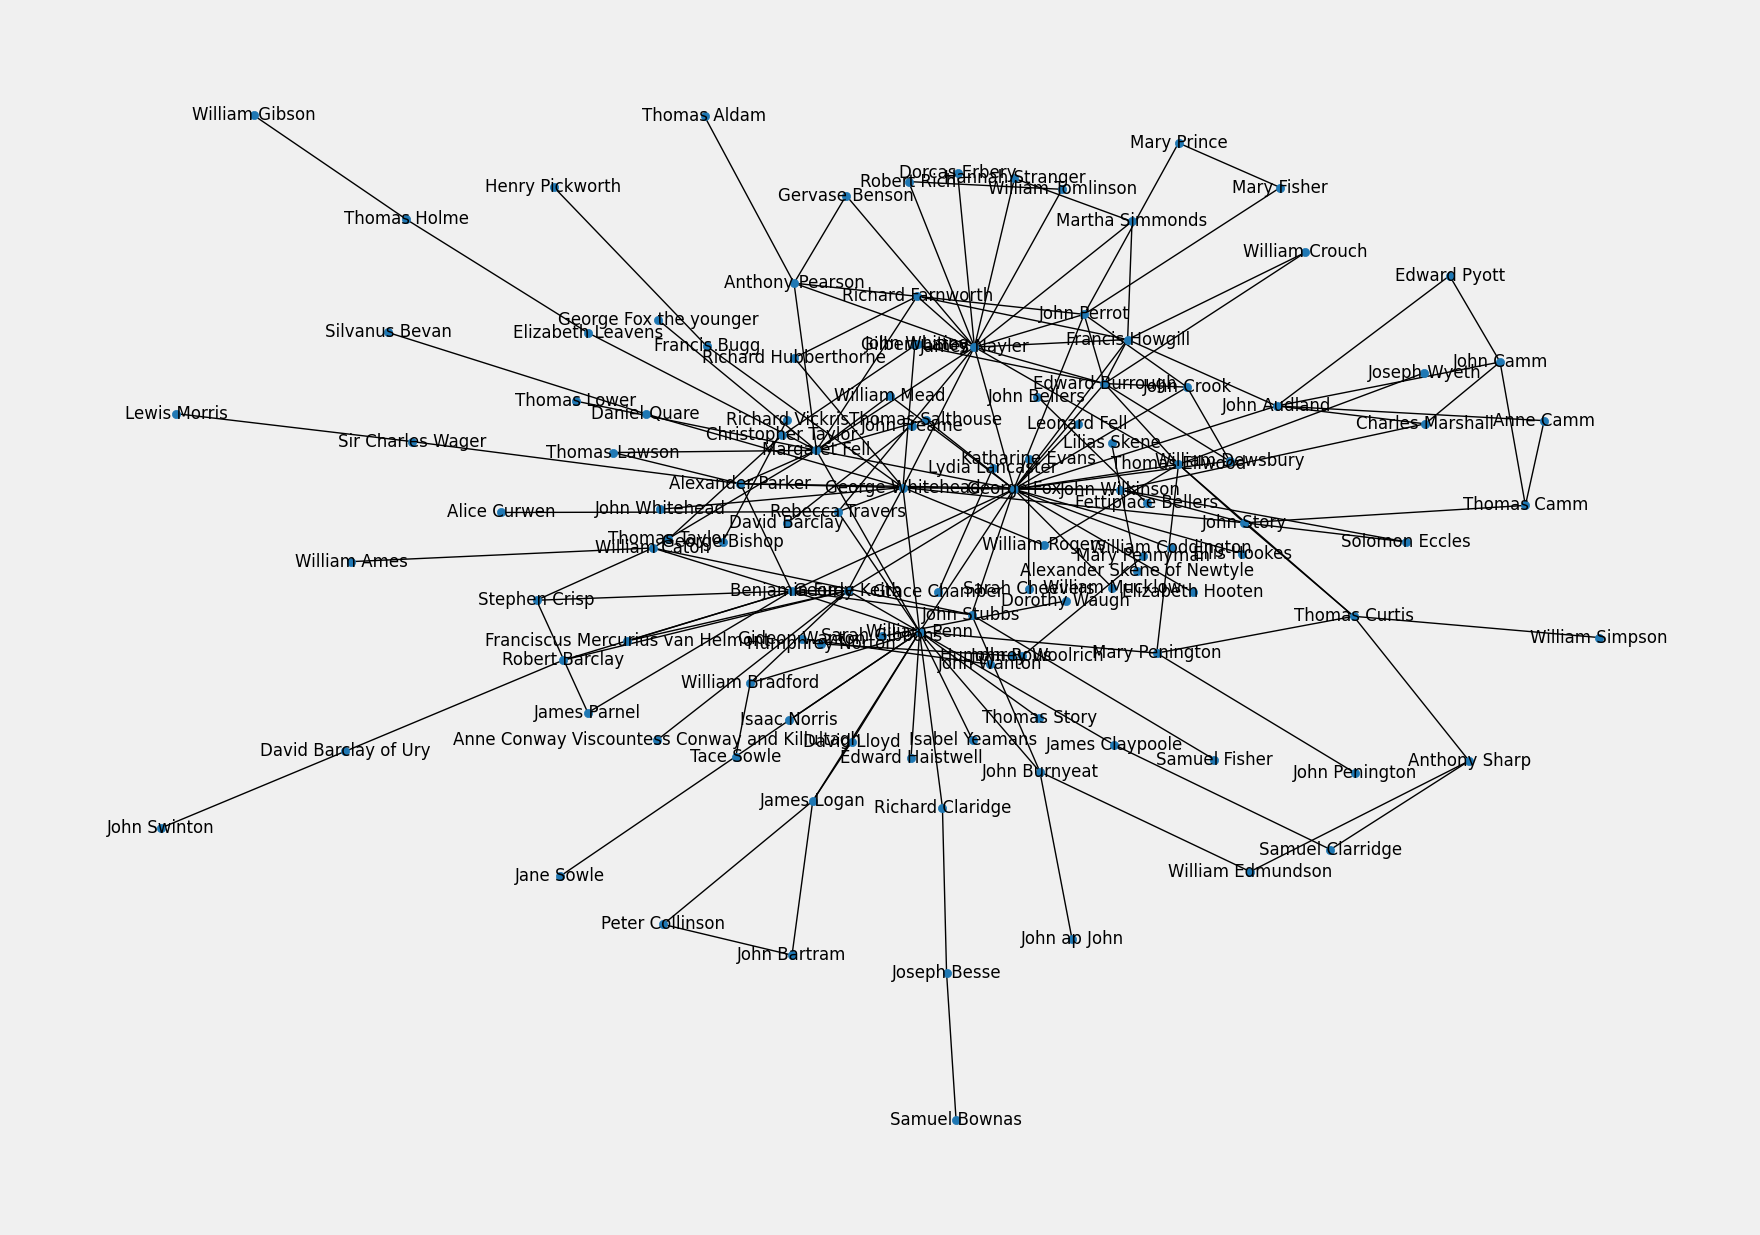

In [18]:
#Data Visualization with Kamada Kawai Layout
pos = nx.kamada_kawai_layout(Quakers_Network)
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
node_color = [20000.0 * Quakers_Network.degree(v) for v in Quakers_Network]
plt.axis('off')
nx.draw_networkx(Quakers_Network, pos, with_labels = True, node_size = 35)
plt.show()

(-1.1278092645605418, 1.174927611982238, -1.17816814925067, 1.2069752540011949)

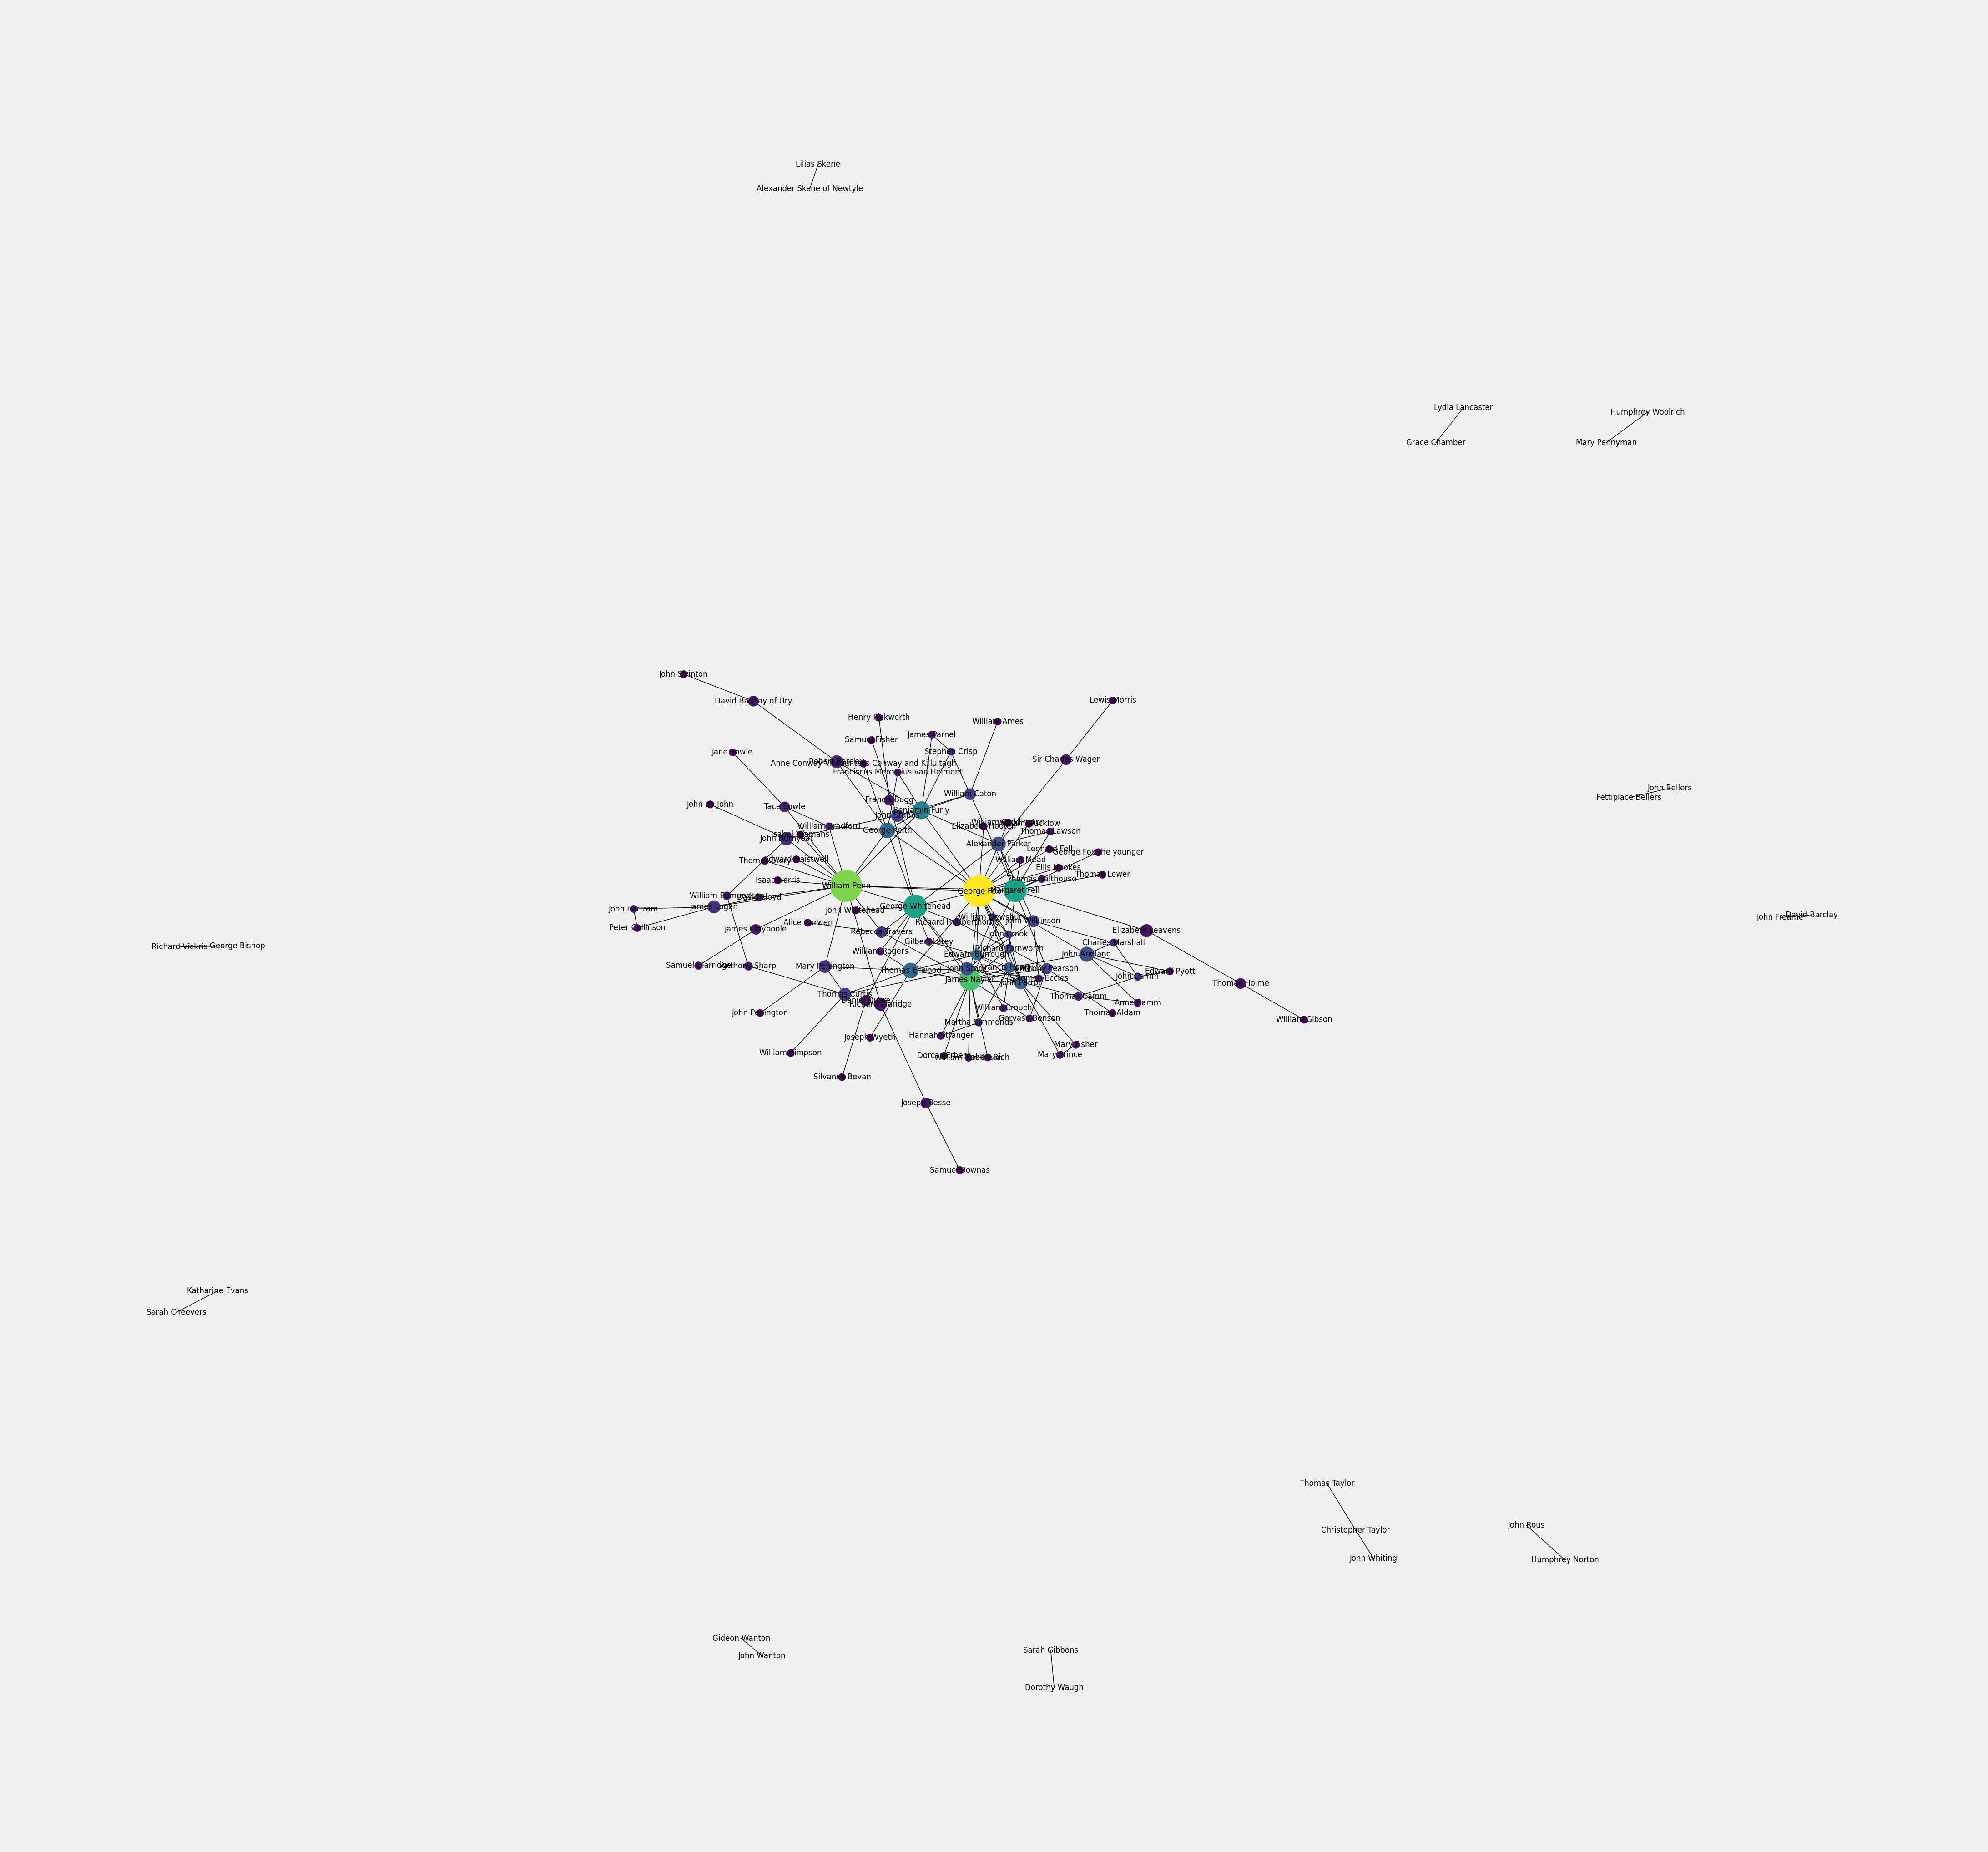

In [19]:
#Data Visualization with Spring Layout
pos = nx.spring_layout(Quakers_Network)
betCent = nx.betweenness_centrality(Quakers_Network, normalized=True, endpoints=True)
node_color = [20000.0 * Quakers_Network.degree(v) for v in Quakers_Network]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx(Quakers_Network, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

(-1.1124216855930267,
 1.2007278524771654,
 -1.1204483178957885,
 1.1416304176836731)

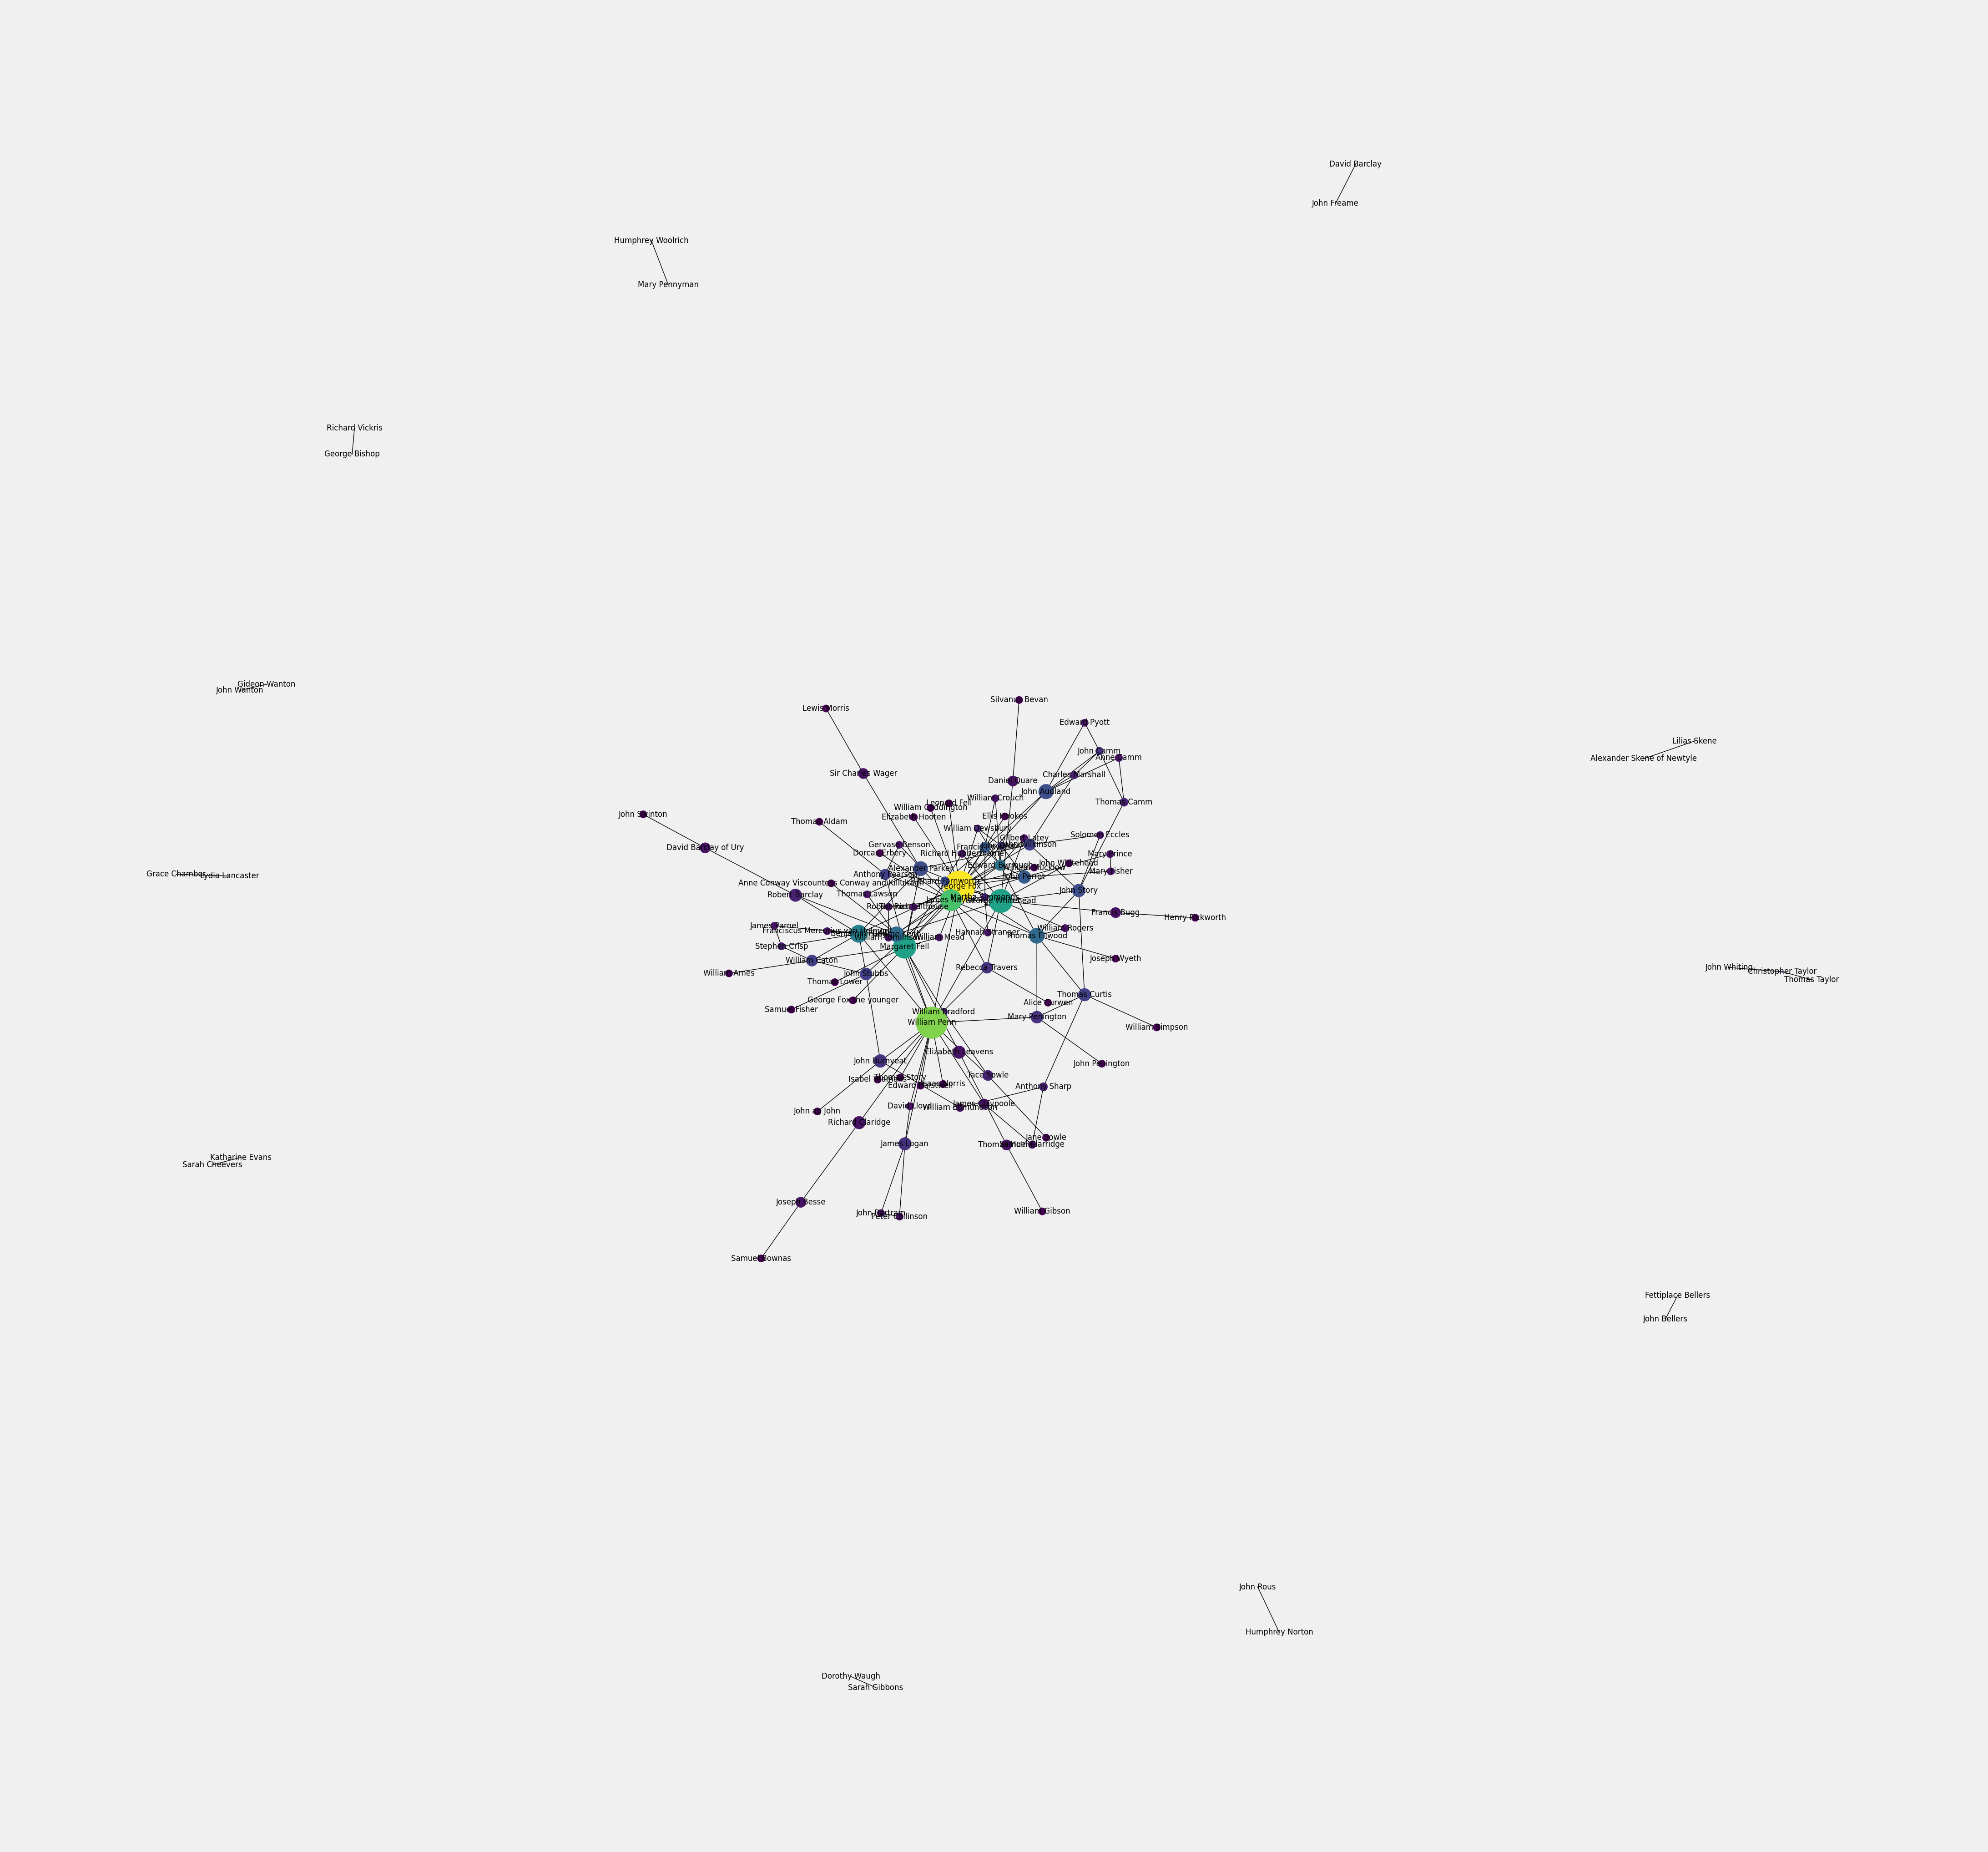

In [20]:
##Data Visualization with Fructherman Rheingold Layout
pos = nx.fruchterman_reingold_layout(Quakers_Network)
betCent = nx.betweenness_centrality(Quakers_Network, normalized=True, endpoints=True)
node_color = [20000.0 * Quakers_Network.degree(v) for v in Quakers_Network]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx(Quakers_Network, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

Phase 5 (All About Key Player)

In [21]:
# Show Node Degree
nx.degree(Quakers_Network)

DegreeView({'Joseph Wyeth': 1, 'Alexander Skene of Newtyle': 1, 'James Logan': 4, 'Dorcas Erbery': 1, 'Lilias Skene': 1, 'William Mucklow': 1, 'Thomas Salthouse': 2, 'William Dewsbury': 3, 'John Audland': 6, 'Richard Claridge': 2, 'William Bradford': 3, 'Fettiplace Bellers': 1, 'John Bellers': 1, 'Isabel Yeamans': 1, 'George Fox the younger': 1, 'George Fox': 22, 'John Stubbs': 5, 'Anne Camm': 2, 'John Camm': 4, 'Thomas Camm': 3, 'Katharine Evans': 1, 'Lydia Lancaster': 1, 'Samuel Clarridge': 2, 'Thomas Lower': 1, 'Gervase Benson': 2, 'Stephen Crisp': 3, 'James Claypoole': 2, 'Thomas Holme': 2, 'John Freame': 1, 'John Swinton': 1, 'William Mead': 2, 'Henry Pickworth': 1, 'John Crook': 4, 'Gilbert Latey': 2, 'Ellis Hookes': 1, 'Joseph Besse': 2, 'James Nayler': 16, 'Elizabeth Hooten': 1, 'George Whitehead': 13, 'John Whitehead': 1, 'William Crouch': 2, 'Benjamin Furly': 10, 'Silvanus Bevan': 1, 'Robert Rich': 2, 'John Whiting': 1, 'Christopher Taylor': 2, 'Thomas Lawson': 2, 'Richard Fa

nodes yang memiliki degree paling besar adalah George Fox, artinya, George Fox memiliki hubungan paling banyak engan orang lain

In [22]:
# Sorted from the highest Degree Centrality (Top 10)
# node with the highest number of connections
sorted(nx.degree(Quakers_Network), key=lambda x: x[1], reverse=True)[0:10]

[('George Fox', 22),
 ('William Penn', 18),
 ('James Nayler', 16),
 ('George Whitehead', 13),
 ('Margaret Fell', 13),
 ('Benjamin Furly', 10),
 ('Edward Burrough', 9),
 ('George Keith', 8),
 ('Thomas Ellwood', 8),
 ('Francis Howgill', 7)]

yang memiliki hubungan paling banyak adalah george fox

In [23]:
# Sorted from the highest Betweeness Centrality (Top 10)
# Betweenness centrality measures the extent to which a vertex or nodes plays this bridging role in a network.
sorted(nx.betweenness_centrality(Quakers_Network, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[('William Penn', 0.23999456006192205),
 ('George Fox', 0.23683257726065216),
 ('George Whitehead', 0.12632024847366005),
 ('Margaret Fell', 0.12106792237170329),
 ('James Nayler', 0.10446026280446098),
 ('Benjamin Furly', 0.06419626175167242),
 ('Thomas Ellwood', 0.046190623885104545),
 ('George Keith', 0.045006564009171565),
 ('John Audland', 0.04164936340077581),
 ('Alexander Parker', 0.03893676140525336)]

orang yang berperan besar dalam menghubungkan orang lain adalah William Penn

In [24]:
# Sorted from the highest Closeness Centrality (Top 10)
#  indicates how close a node is to all other nodes in the network.
sorted(nx.closeness_centrality(Quakers_Network).items(), key=lambda x:x[1], reverse=True)[0:10]

[('George Fox', 0.39222077357670576),
 ('William Penn', 0.3730880529144274),
 ('George Whitehead', 0.3540881983678594),
 ('Margaret Fell', 0.33842057897105143),
 ('James Nayler', 0.3310954582141023),
 ('George Keith', 0.3254597908402452),
 ('Benjamin Furly', 0.3213573565019228),
 ('Thomas Ellwood', 0.30230454880418034),
 ('Edward Burrough', 0.29759941963991293),
 ('Rebecca Travers', 0.29759941963991293)]

orang yang memiliki kedekatan paling besar adalag George Fox

In [25]:
# Sorted from the highest Eigenvector Centrality (Top 10)
# nodes that has influence in a network. ex; how many people know the person and how many people do the person know.
sorted(nx.eigenvector_centrality(Quakers_Network).items(), key=lambda x:x[1], reverse=True)[0:10]

[('George Fox', 0.4491750710859924),
 ('James Nayler', 0.3352974100447867),
 ('William Penn', 0.27032201153998675),
 ('Margaret Fell', 0.253170949905681),
 ('George Whitehead', 0.2497455334914196),
 ('Edward Burrough', 0.23147427604862303),
 ('Francis Howgill', 0.19095393782681047),
 ('Benjamin Furly', 0.1878520634691651),
 ('John Perrot', 0.18496928077956107),
 ('George Keith', 0.1838469086791535)]

orang yang memiliki pengaruh paling besar adalag George Fox